# Bike Sharing Prediction - Group 3

The current study deals with the exploration and preparation of a dataset concerning bicycle rentals in Washington D.C, in order to predict the total number of rental bicycles per hour. The dataset is structured as follows:
* **instant:** record index
* **dteday:** date
* **hr:** hour (0 to 23)
* **weathersit:** Weather situation
* **temp:** Normalized temperature in Celsius. The values are divided to 41 (max)
* **atemp:** Normalized feeling temperature in Celsius. The values are divided to 50 (max)
* **hum:** Normalized humidity. The values are divided to 100 (max)
* **windspeed:** Normalized wind speed. The values are divided to 67 (max)
* **casual:** count of casual users
* **registered:** count of registered users
* **cnt:** count of total rental bikes including both casual and registered. This is the target to predict.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bike-Sharing-Prediction---Group-3" data-toc-modified-id="Bike-Sharing-Prediction---Group-3-1">Bike Sharing Prediction - Group 3</a></span><ul class="toc-item"><li><span><a href="#1.-Environment-Setup-and-Dataset-Import" data-toc-modified-id="1.-Environment-Setup-and-Dataset-Import-1.1">1. Environment Setup and Dataset Import</a></span></li><li><span><a href="#2.-Exploratory-Data-Analysis" data-toc-modified-id="2.-Exploratory-Data-Analysis-1.2">2. Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#2.1-Data-types-of-dataset" data-toc-modified-id="2.1-Data-types-of-dataset-1.2.1">2.1 Data types of dataset</a></span></li><li><span><a href="#2.2-Missing-values-in-each-column" data-toc-modified-id="2.2-Missing-values-in-each-column-1.2.2">2.2 Missing values in each column</a></span></li><li><span><a href="#2.3-Distribution-of-each-column" data-toc-modified-id="2.3-Distribution-of-each-column-1.2.3">2.3 Distribution of each column</a></span><ul class="toc-item"><li><span><a href="#2.3.1-Categorical-columns" data-toc-modified-id="2.3.1-Categorical-columns-1.2.3.1">2.3.1 Categorical columns</a></span></li><li><span><a href="#2.3.2-Numerical-columns" data-toc-modified-id="2.3.2-Numerical-columns-1.2.3.2">2.3.2 Numerical columns</a></span></li></ul></li><li><span><a href="#2.4-Correlations-between-columns" data-toc-modified-id="2.4-Correlations-between-columns-1.2.4">2.4 Correlations between columns</a></span></li><li><span><a href="#2.5-Principal-Component-Analysis" data-toc-modified-id="2.5-Principal-Component-Analysis-1.2.5">2.5 Principal Component Analysis</a></span></li></ul></li><li><span><a href="#3.-Data-Engineering" data-toc-modified-id="3.-Data-Engineering-1.3">3. Data Engineering</a></span><ul class="toc-item"><li><span><a href="#3.1-Encoding-and-Transforming-'dteday'" data-toc-modified-id="3.1-Encoding-and-Transforming-'dteday'-1.3.1">3.1 Encoding and Transforming 'dteday'</a></span><ul class="toc-item"><li><span><a href="#3.1.1-Creating-a-column-for-each-season" data-toc-modified-id="3.1.1-Creating-a-column-for-each-season-1.3.1.1">3.1.1 Creating a column for each season</a></span></li><li><span><a href="#3.1.2-Creating-a-column-for-weekends" data-toc-modified-id="3.1.2-Creating-a-column-for-weekends-1.3.1.2">3.1.2 Creating a column for weekends</a></span></li><li><span><a href="#3.1.3-Creating-a-column-for-holidays" data-toc-modified-id="3.1.3-Creating-a-column-for-holidays-1.3.1.3">3.1.3 Creating a column for holidays</a></span></li></ul></li><li><span><a href="#3.2-Cleaning,-Encoding,-and-Transforming-'weathersit'" data-toc-modified-id="3.2-Cleaning,-Encoding,-and-Transforming-'weathersit'-1.3.2">3.2 Cleaning, Encoding, and Transforming 'weathersit'</a></span></li><li><span><a href="#3.3-Encoding-and-Transforming-'hr'" data-toc-modified-id="3.3-Encoding-and-Transforming-'hr'-1.3.3">3.3 Encoding and Transforming 'hr'</a></span><ul class="toc-item"><li><span><a href="#3.3.1-Normalizing-'hr'" data-toc-modified-id="3.3.1-Normalizing-'hr'-1.3.3.1">3.3.1 Normalizing 'hr'</a></span></li><li><span><a href="#3.3.2-Creating-a-column-specifying-whether-it-is-day" data-toc-modified-id="3.3.2-Creating-a-column-specifying-whether-it-is-day-1.3.3.2">3.3.2 Creating a column specifying whether it is day</a></span></li><li><span><a href="#3.3.3-Creating-a-column-specifying-whether-the-daily-commute-to-work-is-happening" data-toc-modified-id="3.3.3-Creating-a-column-specifying-whether-the-daily-commute-to-work-is-happening-1.3.3.3">3.3.3 Creating a column specifying whether the daily commute to work is happening</a></span></li></ul></li><li><span><a href="#3.4-Cleaning,-Encoding,-and-Transforming-'hum'" data-toc-modified-id="3.4-Cleaning,-Encoding,-and-Transforming-'hum'-1.3.4">3.4 Cleaning, Encoding, and Transforming 'hum'</a></span><ul class="toc-item"><li><span><a href="#3.4.1-Dealing-with-outliers-and-NaN-values" data-toc-modified-id="3.4.1-Dealing-with-outliers-and-NaN-values-1.3.4.1">3.4.1 Dealing with outliers and NaN values</a></span></li><li><span><a href="#3.4.2-Normalizing-'hum'" data-toc-modified-id="3.4.2-Normalizing-'hum'-1.3.4.2">3.4.2 Normalizing 'hum'</a></span></li><li><span><a href="#3.4.3-Final-Pipeline" data-toc-modified-id="3.4.3-Final-Pipeline-1.3.4.3">3.4.3 Final Pipeline</a></span></li></ul></li><li><span><a href="#3.5-Cleaning,-Encoding-and-Transforming-'windspeed'" data-toc-modified-id="3.5-Cleaning,-Encoding-and-Transforming-'windspeed'-1.3.5">3.5 Cleaning, Encoding and Transforming 'windspeed'</a></span><ul class="toc-item"><li><span><a href="#3.5.1-Deailing-with-outliers-and-NaN-values" data-toc-modified-id="3.5.1-Deailing-with-outliers-and-NaN-values-1.3.5.1">3.5.1 Deailing with outliers and NaN values</a></span></li><li><span><a href="#3.5.2-Normalizing-'windspeed'" data-toc-modified-id="3.5.2-Normalizing-'windspeed'-1.3.5.2">3.5.2 Normalizing 'windspeed'</a></span></li><li><span><a href="#3.5.3-Final-Pipeline" data-toc-modified-id="3.5.3-Final-Pipeline-1.3.5.3">3.5.3 Final Pipeline</a></span></li></ul></li><li><span><a href="#3.6-Cleaning,-Encoding-and-Transforming-'atemp'-and-'temp'" data-toc-modified-id="3.6-Cleaning,-Encoding-and-Transforming-'atemp'-and-'temp'-1.3.6">3.6 Cleaning, Encoding and Transforming 'atemp' and 'temp'</a></span></li><li><span><a href="#3.7-Encoding-and-Transforming-'cnt'" data-toc-modified-id="3.7-Encoding-and-Transforming-'cnt'-1.3.7">3.7 Encoding and Transforming 'cnt'</a></span></li><li><span><a href="#3.8-Assembling-all-Preprocessing-Steps" data-toc-modified-id="3.8-Assembling-all-Preprocessing-Steps-1.3.8">3.8 Assembling all Preprocessing Steps</a></span></li><li><span><a href="#3.9-Examining-Correlations-after-Preprocessing" data-toc-modified-id="3.9-Examining-Correlations-after-Preprocessing-1.3.9">3.9 Examining Correlations after Preprocessing</a></span></li></ul></li><li><span><a href="#4.-Choosing-and-Training-a-Model" data-toc-modified-id="4.-Choosing-and-Training-a-Model-1.4">4. Choosing and Training a Model</a></span><ul class="toc-item"><li><span><a href="#4.1-Splitting-into-Training-and-Test-Datasets" data-toc-modified-id="4.1-Splitting-into-Training-and-Test-Datasets-1.4.1">4.1 Splitting into Training and Test Datasets</a></span></li><li><span><a href="#4.2-Simple-Linear-Regression" data-toc-modified-id="4.2-Simple-Linear-Regression-1.4.2">4.2 Simple Linear Regression</a></span></li><li><span><a href="#4.3-k-NN-Regression" data-toc-modified-id="4.3-k-NN-Regression-1.4.3">4.3 k-NN Regression</a></span></li><li><span><a href="#4.4-Random-Forest-Regression" data-toc-modified-id="4.4-Random-Forest-Regression-1.4.4">4.4 Random Forest Regression</a></span></li><li><span><a href="#4.5-Gradient-Boosting-Regression" data-toc-modified-id="4.5-Gradient-Boosting-Regression-1.4.5">4.5 Gradient Boosting Regression</a></span></li><li><span><a href="#4.6-Hyperparameter-Tuning-and-Model-Selection" data-toc-modified-id="4.6-Hyperparameter-Tuning-and-Model-Selection-1.4.6">4.6 Hyperparameter Tuning and Model Selection</a></span></li><li><span><a href="#4.7-Further-Hyperparameter-Tuning-for-RandomForestRegressor" data-toc-modified-id="4.7-Further-Hyperparameter-Tuning-for-RandomForestRegressor-1.4.7">4.7 Further Hyperparameter Tuning for <code>RandomForestRegressor</code></a></span><ul class="toc-item"><li><span><a href="#4.7.1-Tuning-n_estimators" data-toc-modified-id="4.7.1-Tuning-n_estimators-1.4.7.1">4.7.1 Tuning <code>n_estimators</code></a></span></li><li><span><a href="#4.7.2-Tuning-max_depth" data-toc-modified-id="4.7.2-Tuning-max_depth-1.4.7.2">4.7.2 Tuning <code>max_depth</code></a></span></li><li><span><a href="#4.7.3-Tuning-min_samples_split" data-toc-modified-id="4.7.3-Tuning-min_samples_split-1.4.7.3">4.7.3 Tuning <code>min_samples_split</code></a></span></li><li><span><a href="#4.7.4-Final-Hyperparameter-Selection" data-toc-modified-id="4.7.4-Final-Hyperparameter-Selection-1.4.7.4">4.7.4 Final Hyperparameter Selection</a></span></li></ul></li><li><span><a href="#4.8-Prediction-with-Optimum-Model" data-toc-modified-id="4.8-Prediction-with-Optimum-Model-1.4.8">4.8 Prediction with Optimum Model</a></span></li></ul></li><li><span><a href="#5.-Conclusions" data-toc-modified-id="5.-Conclusions-1.5">5. Conclusions</a></span></li></ul></li></ul></div>

## 1. Environment Setup and Dataset Import

In [1]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, MinMaxScaler, PowerTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, validation_curve
import sklearn
sklearn.set_config(display="diagram")

In [2]:
df = pd.read_csv('hour.csv', parse_dates=['dteday'], index_col=['instant'])
df.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,
1,2011-01-01,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,3,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,4,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


## 2. Exploratory Data Analysis
### 2.1 Data types of dataset
A first view at the data types of each column proves useful in later analyses.

In [3]:
df.dtypes

dteday        datetime64[ns]
hr                     int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

### 2.2 Missing values in each column
Now, to examine the amount of missing values in each column.

In [4]:
len(df)

17379

In [5]:
df.isnull().sum()

dteday          0
hr              0
weathersit    100
temp           99
atemp         100
hum           100
windspeed     100
casual          0
registered      0
cnt             0
dtype: int64

The 5 columns representing weather data show around 100 missing values, probably due to sensor failures. One of these variables, "weathersit" is nonetheless a string, and its null values may have different causes. Let's look at whether these null values occur at the same time for multiple columns.

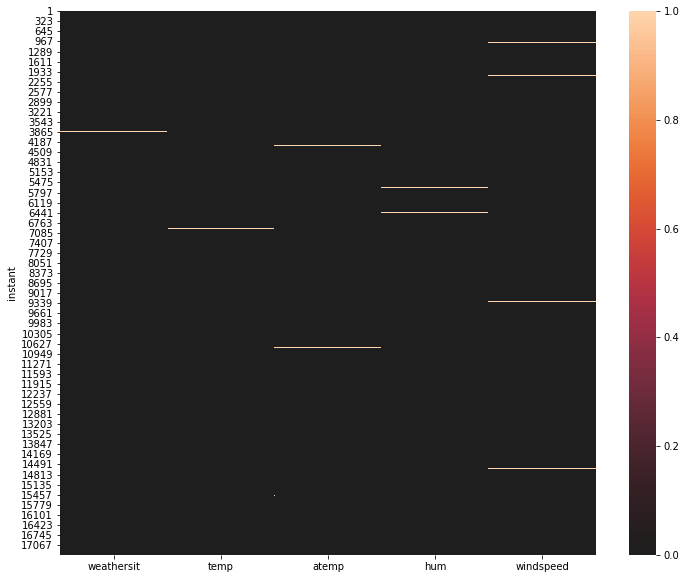

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
nan_mat = sns.heatmap(df[['weathersit', 'temp', 'atemp', 'hum', 'windspeed']].isna(), ax=ax, center=0)

Based on the tiny slits visible in this heatmap, one can infer that several rows of NaN values appear together. For instance, 'weathersit' has all its 100 NaN values close to the 3864th row. However, no two columns are null at exactly the same row. This makes one think of independent sensor failures.

### 2.3 Distribution of each column
#### 2.3.1 Categorical columns
Let's start by checking the number of unique values for the categorical variables in the dataframe.

In [7]:
df['weathersit'].value_counts(dropna=False)

Clear, Few clouds, Partly cloudy, Partly cloudy                                            11345
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                4517
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     1414
NaN                                                                                          100
Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                     3
Name: weathersit, dtype: int64

The entries on this column are fairly strange, since:
* Weather conditions are repeated in the same entry (for example, 'Partly cloudy' appears twice in the first entry type)
* Weather conditions can be separated by ',' but also by '+'.

It may be necessary later on to separate individual conditions and one-hot encode them. The degree of separation (whether to create a dummy variable for 'Mist + Cloudy' and another for 'Mist + Broken clouds' instead of a dummy variable for 'Mist', another one for 'Cloudy', and another one for 'Broken clouds' will be evaluated later on.

#### 2.3.2 Numerical columns
Starting with the date column:

In [8]:
print(df['dteday'].min(), df['dteday'].max())

2011-01-01 00:00:00 2012-12-31 00:00:00


Now, to observe the distribution of numerical columns in the dataset, one can begin analyzing the max, min, mean, and quartile values of each of these columns.

In [9]:
df[['hr', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].describe()

,hr,temp,atemp,hum,windspeed,cnt
count,17379.000000,17280.000000,17279.000000,17279.000000,17279.000000,17379.000000
mean,11.546752,0.497071,0.475530,0.627235,0.190114,189.463088
std,6.914405,0.192474,0.171782,0.193047,0.122378,181.387599
min,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,12.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,18.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,23.000000,1.000000,1.000000,1.000000,0.850700,977.000000


Further, one can also observe the distribution of each of these variables.

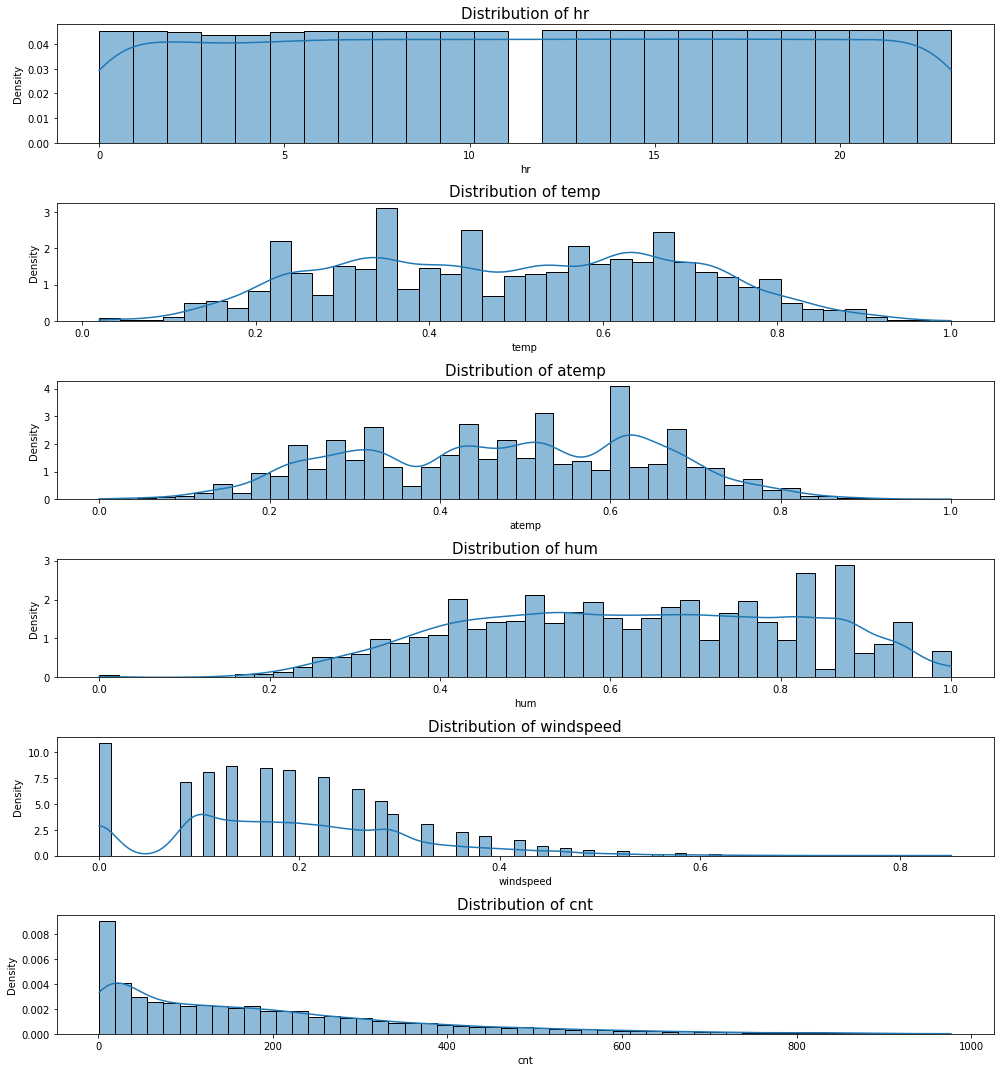

In [10]:
fields = ['hr', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
fig, axs = plt.subplots(figsize=(14, 15), ncols=1, nrows=len(fields), sharey=False)
for field, ax in zip(fields, axs):
    ax.set_title('Distribution of ' + field, fontsize=15)
    sns.histplot(df[field], ax=ax, kde=True, stat='density')
fig.tight_layout()

As a result:
* 'hr' is seen to follow a uniform distribution, with a slight low at noon.
* 'temp' and 'atemp' are very widely spread from 0.2 to 0.8, with certain inhomogeneities in the middle.
* 'hum' does not present a centered distribution, with most values above 0.5. It may make sense to normalize this distribution, and to eliminate occurrences where 'hum'=0, since there is no smooth transition towards this value, making one suspect of sensor failure.
* 'windspeed' is right-skewed, with a large peak at 0. This variable may benefit from Box-Cox normalization. Larger histogram bins may improve this representation. Why the peak at 0? Is it because a certain minimum windspeed is necessary to activate the sensor? This make sense if one thinks of a very heavy anemometer, which requires some wind to start rotating.
* The target 'cnt' is even more right-skewed, with an even larger peak at 0. There are a large number of outlier variables.

Now it follows to determine if there are significant outliers for each of these numerical columns. As well as further learning about the variables' distribution, a box-plot of each column will provide this insight.

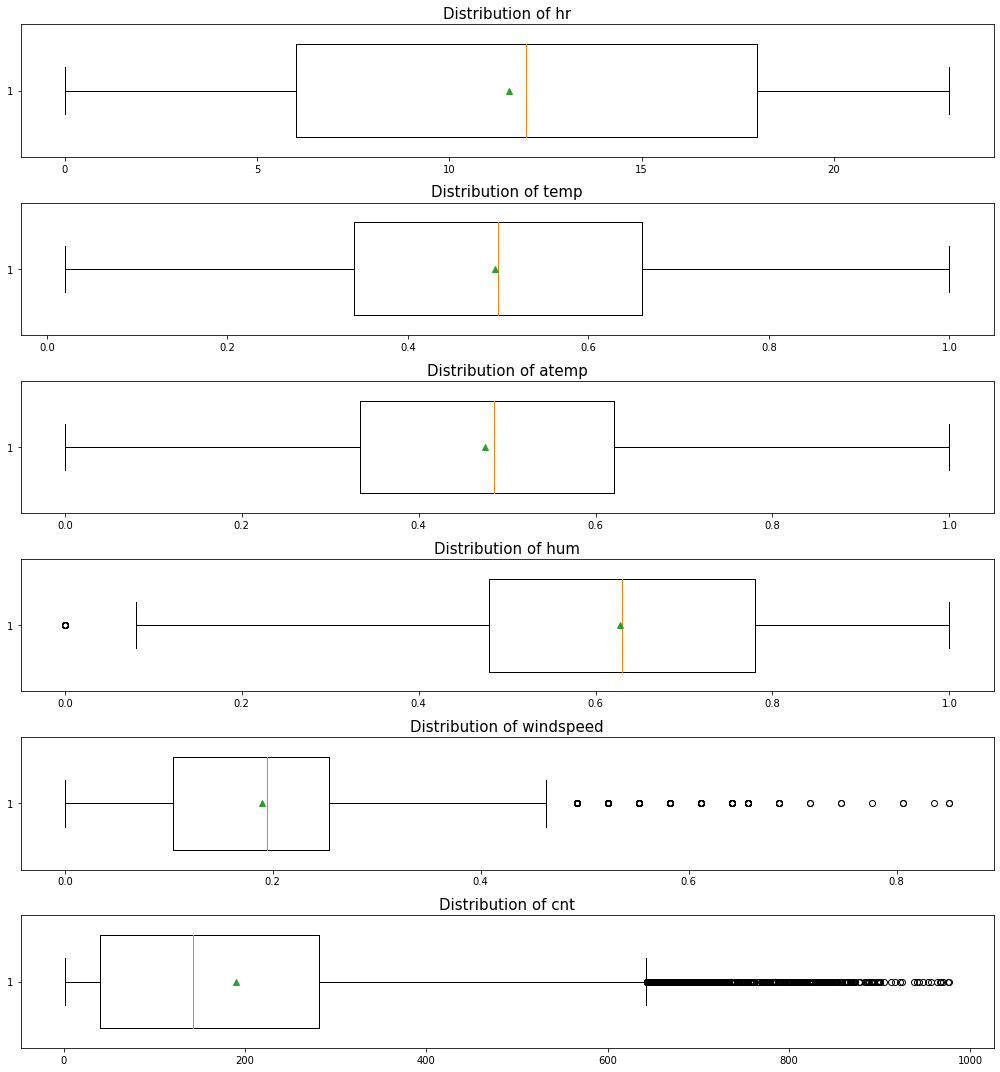

In [11]:
fields = ['hr', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
fig, axs = plt.subplots(figsize=(14, 15), ncols=1, nrows=len(fields), sharey=False)
for field, ax in zip(fields, axs):
    ax.set_title('Distribution of ' + field, fontsize=15)
    ax.boxplot(df[field].dropna().values, vert=False, widths=0.7, showmeans=True)
fig.tight_layout()

Some notes on these results:
* **hum:** As confirmed, the lack of a smooth evolution towards the peak at 'hum'=0 makes one think of outliers for this value. This is confirmed at this box-plot, where values of 'hum' below Q1 - 1.5*(Q3 - Q1) are marked as outliers.
* **windspeed:** There is a significant number of outliers beyond Q3 + 1.5*(Q3 - Q1).
* **cnt:** As previously mentioned, there is a large number of days with an extreme number of bicycle rentals. These are probably to be removed.

### 2.4 Correlations between columns
For determining:
* What columns affect most significantly on the target variable
* What columns present redundant information

It is useful to examine the correlation matrix of all columns in the dataframe.

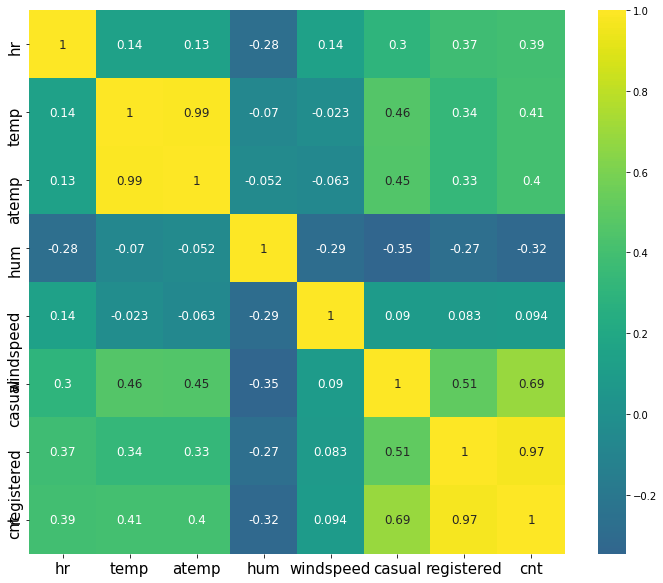

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))
corr_mat = sns.heatmap(df.corr(), annot=True, cmap='viridis', ax=ax, center=0, annot_kws={"fontsize":12})
xtick_labels = corr_mat.get_xmajorticklabels()
ytick_labels = corr_mat.get_ymajorticklabels()
_ = corr_mat.set_xticklabels(xtick_labels, fontsize = 15)
_ = corr_mat.set_yticklabels(ytick_labels, fontsize = 15)

Insights extracted from this chart:
* 'atemp' and 'temp' are redundant
* 'casual' and 'registered' are extremely correlated with 'cnt'. This is obviously because 'cnt' = 'casual' + 'registered'
* 'hum' has a very strong negative correlation with 'cnt'
* 'temp' and 'atemp' have a strong positive correlation with 'cnt'
* 'hr' has a strong positive correlation with 'cnt'

Let's take a further look at the relations between 'hr', 'temp', 'hum', and 'windspeed' with 'cnt'.

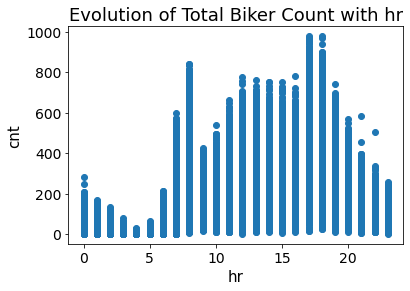

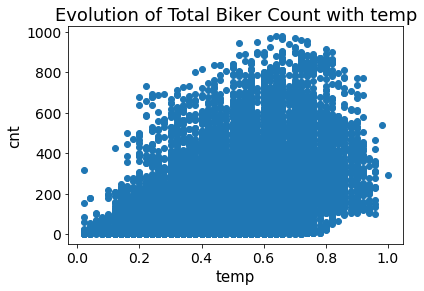

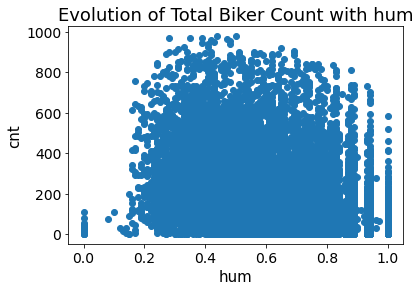

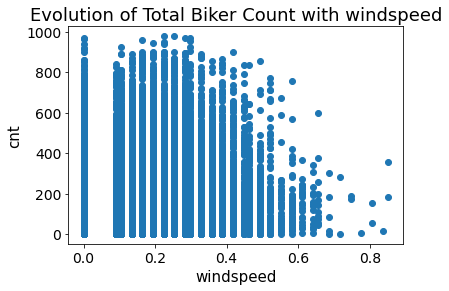

In [13]:
for x in ['hr', 'temp', 'hum', 'windspeed']:
    plt.figure()
    plt.title('Evolution of Total Biker Count with ' + x, fontsize=18)
    plt.scatter(df[x], df['cnt'])
    plt.xlabel(x, fontsize=15)
    plt.ylabel('cnt', fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

The relationships between the target 'cnt' and these three variables are not as straight-forward as one would expect:
* **hr:** One can see that there is a significant peak in biker traffic in the middle of the afternoon (17:00), precisely matching the habitual hour of the commute home from the workplace. After this peak, the maximum traffic for a given hour decreases until the early morning of the next day (around 4:00), when traffic increases again. This is therefore not a monotonic relationship, although the positive correlation between both variables may make one think so.
* **temp (and atemp):** The relation between temperature and bicycle traffic is more sensible, since as temperature increases, bicycle traffic increases clearly. There is even a temperature at which the minimum recorded traffic is beyond 0.
* **hum:** The effect of humidity on traffic is harder to clarify. However, it is visible that for very low humidities, no cyclists are recorded. This makes one think that recordings in which 'hum' is 0 correspond to measurement errors that have to be removed.
* **windspeed:** If windspeed is relatively large, maximum bicycle traffic decreases. There is a very strong usage of these rental bicycles when the windspeed is 0.

### 2.5 Principal Component Analysis
To examine whether defining new features based linear combinations of original features may prove useful for the prediction, an initial PCA of the dataset might prove useful. In this case, we will focus only on the four previously examined numerical features, in the first place normalizing 'hr' in the same way as 'temp', 'hum', and 'windspeed'.

In [14]:
df['hr_minmax'] = (df['hr'] - df['hr'].min()) / (df['hr'].max() - df['hr'].min())
pca = PCA(n_components='mle')
pca.fit(df[['hr_minmax', 'temp', 'hum', 'windspeed']].dropna())
df.drop(columns='hr_minmax', inplace=True)

In [15]:
pca.n_components_

3

In [16]:
X_transformed = pd.DataFrame(np.eye(3))
X_original = pca.inverse_transform(X_transformed)
print('Original Feature Space: \n', X_original)

Original Feature Space: 
 [[ 1.45030439  0.63392716  0.35365478  0.27150121]
 [ 0.63126884 -0.49183984  0.60181545  0.25582605]
 [ 0.21322393  0.50005435 -0.29602211  0.44363473]]


Here, one can see how a simple PCA analysis, where the number of transformed features is automatically set, combines these four numerical variables into three. As we can see from the inverse transformation from the transformed feature space to the original space:
* **First transformed feature:** 1.45030439 * hr + 0.63392716 * temp + 0.35365478 * hum +  0.27150121 * windspeed
* **Second transformed feature:** 0.63126884 * hr - 0.49183984 * temp + 0.60181545 * hum +  0.25582605 * windspeed
* **Third transformed feature:** 0.21322393 * hr + 0.50005435 * temp - 0.29602211 * hum +  0.44363473 * windspeed

These insights might be useful later on in the study, since instead of using each of these variables as they are, one could introduce these combined, transformed features, to carry out predictions based on the directions of maximum variance within the dataset's cloud of points.

## 3. Data Engineering 

### 3.1 Encoding and Transforming 'dteday'
**What to do with 'dteday'?**
It makes scarce sense to use this column as is to train the model, since it simply has a single value for each day in the dataset, each day repeating 24 times, per each of the 24 hours in the day. Instead, one has to extract valuable information from the date, grouping different dates into groups that add value to our prediction. These are some possible groupings for dates that add meaning to the prediction:
* Grouping by season: Clearly, as the weather changes with the seasons, it is expected for bike rentals to vary. A snowy Washington D.C. during the winter will definitely not see as many rentals as in a hot summer day. However, one has to be careful here, since linking seasons to weather may introduce features redundant with others such as 'temp', 'hum', or 'windspeed'.
* Grouping by holiday-workday: Since during national holidays people might rent bicycles for leisure rather than for commuting to work, there may be variations in 'cnt' from holidays to workdays. Thus, one can extract information from 'dteday', by separating days into holidays (including weekends and school summer vacations, as well as national holidays) and workdays.

These groupings can be expressed in terms of two new features.

#### 3.1.1 Creating a column for each season
For this feature engineering, we first started by extracting the month for each date by using the DateTimeIndex method applied to our column dteday using the month condition

In [17]:
df['Month'] = pd.DatetimeIndex(df['dteday']).month

The second step of the creation consists of creating a dictionnary of the seasons with respect to the months extracted in the previous step. 

In [18]:
season_months = {"Winter": [1, 2, 3], "Spring": [4, 5, 6], "Summer": [7, 8, 9], "Fall": [10, 11, 12]}
for season in season_months.keys():
    df[season] = df['Month'].apply(lambda m: 1 if m in season_months[season] else 0)

df[[f for f in season_months.keys()]].head(10)

,Winter,Spring,Summer,Fall
instant,,,,
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0


#### 3.1.2 Creating a column for weekends
Extracting the day of the week and defining if the day is workday or weekend, where the value 0 will represent the first day of the week, Monday.

In [19]:
df['Day_of_Week'] = df['dteday'].dt.dayofweek
df['Day_of_Week'].value_counts()

5    2512
6    2502
4    2487
0    2479
2    2475
3    2471
1    2453
Name: Day_of_Week, dtype: int64

In [20]:
df['Weekend'] = df['Day_of_Week'].apply(lambda x: 1 if x > 4 else 0)
df['Weekend'].value_counts()

0    12365
1     5014
Name: Weekend, dtype: int64

#### 3.1.3 Creating a column for holidays

Compare and identify if the date of our dataframe is holiday or not according to the US federal holidays calendar


We have imported the USFederalHolidayCalendar  from pandas timeseries "package". 

We have to keep in mind that our dteday is a as datetime64 that pandas failed to identify. A conversion using pydatetime is necessary so that the dates are converted into the "proper" python data type. 

In the variable usholidays with have thus defined the date_range from which we want to compare if the date is a holiday or not 
using the calendar function derived from USFederalHolidayCalendar.

Finally, we create our column holiday where the output will be of type Boolean and return true if the value of dteday is present in the variable holiday defined before and then converted into integers type to be able to plot a correlation analysis further on.

The count indicates us that there are 452 true values, considering that there are 24hours per day and the index instant  measure the hour per day 

This gives us around 19 days of holidays per year, considering 452 are for two years. 

In [21]:
cal=calendar()

usholidays=cal.holidays(start=df['dteday'].min(), end=df['dteday'].max()).to_pydatetime()

df['Holidays'] = df['dteday'].isin(usholidays).astype(int)

df.Holidays.value_counts()

0    16927
1      452
Name: Holidays, dtype: int64

### 3.2 Cleaning, Encoding, and Transforming 'weathersit'
**What to do with 'weathersit'?** As seen in the previous section, this feature has 4 unique values:
* "Clear, Few clouds, Partly cloudy, Partly cloudy"
* "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
* "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"
* "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
* NaN

It seems that multiple weather conditions have already been grouped into the same value for 'weathersit'. For instance, "Heavy Rain" and "Snow + Fog" have been placed within the same 'weathersit' category. Therefore, one can **simply one-hot encode** these 4 categories, after mapping their names into more intuitive ones and dealing with NaN values.

**How to deal with NaN values?** Two different alternative methods are considered here and are defined in the following function:
* Impute NaN values with the most frequently occurring weather condition of the corresponding month. This requires inputting column 'Month' to the user-defined function. Specified with method='most_frequent'.
* Impute NaN values based on the weather conditions of neighboring instants. Specified with method='closest_entry'.

In [22]:
def map_and_impute_weather(df, method='most_frequent'):
    #This method assumes that df has only columns 'Month' and 'weathersit'
    
    #This option setting avoids certain unnecessary warnings from appearing.
    pd.options.mode.chained_assignment = None
    
    #First, rename the different values of 'weathersit' with more intuitive names
    weather_mapping = {"Clear, Few clouds, Partly cloudy, Partly cloudy": "Clear",
                       "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist": "Mist",
                       "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds": "Precipitation",
                       "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog": "Heavy Weather"}
    df[['weathersit']] = df[['weathersit']].replace(weather_mapping)
    
    if method == 'most_frequent':
        #This first method is based on imputing null values with the most common weather conditions of the month.
        
        #Create a lookup table including the most frequent weather conditions of each month
        lookup = df\
                    .groupby(by=['Month', 'weathersit'])['Month']\
                    .agg(pd.Series.count)\
                    .unstack(level=-1)
        lookup = lookup.idxmax(axis=1).rename('Most_Frequent')

        #Then, join the null rows of the original dataframe with the lookup table, to impute these values.
        df.loc[df['weathersit'].isna(), 'weathersit'] = df\
                                                        .loc[df['weathersit'].isna(), :]\
                                                        .join(lookup, on='Month')\
                                                        .drop(columns='weathersit')\
                                                        .rename(columns={'Most_Frequent': 'weathersit'})
        
        
    elif method == 'closest_entry':
        #This second method imputes null values of 'weathersit' with the values of the closest entry in time.
        df[['weathersit']] = df[['weathersit']]\
                                                .fillna(method='bfill', axis=0)\
                                                .fillna(method='ffill', axis=0)
        
    df.drop(columns='Month', inplace=True)
    return df

In [23]:
print(f"method='most_frequent' results in {map_and_impute_weather(df[['Month', 'weathersit']], method='most_frequent').isna().sum()[0]} NaN values. method='closest_entry' results in {map_and_impute_weather(df[['Month', 'weathersit']], method='closest_entry').isna().sum()[0]} NaN values.")

method='most_frequent' results in 0 NaN values. method='closest_entry' results in 0 NaN values.


Based on this function, and making use of scikit-learn's `OneHotEncoder`, we will be able later on to process this column.

In [24]:
weathersit_pipe = Pipeline([
                            ('mapper_and_imputer', FunctionTransformer(map_and_impute_weather)),
                            ('weather_encoder', OneHotEncoder(sparse=False))])
weathersit_pipe.fit_transform(df[['Month', 'weathersit']])

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

### 3.3 Encoding and Transforming 'hr'
**What should be done with 'hr'?** The hour of the day, as seen previously, is significantly related with the amount of rented bicycles, with a large peak of 'cnt' in the middle of afternoon and a decrease afterwards. Three sources of information from 'hr' can be extracted:
1. One can simply normalize 'hr', such that it is within 0 and 1, and treat it as another numerical value. This may be applicable for a non-linear model, since as we have seen, the relationship between 'cnt' and 'hr' is not monotonic.
2. One can determine, for the time of the year, which hours of the day have sunlight and which do not.
3. Lastly, one can associate particular hours during weekdays to commuting to and from the workplace. In other words, one can classify hours as so-called *rush-hours*.

#### 3.3.1 Normalizing 'hr'
The min-max normalization of 'hr' is very easily done by making use of scikit-learn's `MinMaxScaler`. This will be taken into account later on.

#### 3.3.2 Creating a column specifying whether it is day
In order to define this additional column, it is necessary to import data regarding the sunset and sunset hours of Washington D.C. In this case, a table has been created from the data in https://www.worlddata.info/america/usa/sunset.php.

In [25]:
sun_movements = pd.read_csv(
                            'WashingtonDC_Sun.csv', 
                            sep='\t', 
                            header=0, 
                            parse_dates=['Sunrise', 'Sunset'])\
                    .drop(columns='Hours of daylight')
sun_movements.head()

,Month,Sunrise,Sunset
0,Januar,2021-02-28 07:23:00,2021-02-28 17:11:00
1,Februar,2021-02-28 06:57:00,2021-02-28 17:47:00
2,März,2021-02-28 07:17:00,2021-02-28 19:16:00
3,April,2021-02-28 06:29:00,2021-02-28 19:46:00
4,Mai,2021-02-28 05:53:00,2021-02-28 20:15:00


In [26]:
sun_movements['Month'] = np.arange(1, len(sun_movements) + 1)
sun_movements['Sunrise'] = sun_movements['Sunrise'].dt.hour
sun_movements['Sunset'] = sun_movements['Sunset'].dt.hour
sun_movements.head()

,Month,Sunrise,Sunset
0,1,7,17
1,2,6,17
2,3,7,19
3,4,6,19
4,5,5,20


Then, this data is incorporated by joining this table with the original dataset. For every value in 'hr', it is examined whether it is within the Sunrise-Sunset time interval. Since light is present *before* the sun rises and *after* the sun sets, this interval includes the whole hours in which the sun rises and sets.

In [27]:
df = df.merge(sun_movements, on='Month', how='left')

In [28]:
df['Daylight'] = df[['hr', 'Sunrise', 'Sunset']].apply(lambda row: 1 if (row[0] >= row[1] and row[0] <= row[2]) else 0, axis=1)
df[['hr', 'Sunrise', 'Sunset', 'Daylight']].head(20)

,hr,Sunrise,Sunset,Daylight
0,0,7,17,0
1,1,7,17,0
2,2,7,17,0
3,3,7,17,0
4,4,7,17,0
5,5,7,17,0
6,6,7,17,0
7,7,7,17,1
8,8,7,17,1
9,9,7,17,1


In [29]:
df.drop(columns=['Sunrise', 'Sunset'], inplace=True)

#### 3.3.3 Creating a column specifying whether the daily commute to work is happening
To generate this column, we will make use of the previously defined column 'Holiday', and set the new column 'Rush_Hour' to 1 if it isn't a holiday and 'hr' takes a value attributable to the daily commute. According to TripSavvy (https://www.tripsavvy.com/driving-times-from-dc-1040439), rush hour in Washington D.C. occurs from 6 a.m. to 9:30 a.m. and 3:30 p.m. to 6:30 p.m.

In [30]:
df['Rush_Hour'] = df[['Holidays', 'hr']].apply(lambda row:
                                                        1 if (row[0] == 0) and (row[1] in [6, 7, 8, 9, 15, 16, 17, 18])
                                                        else 0, axis=1)
df[['hr', 'Rush_Hour']].head()

,hr,Rush_Hour
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


### 3.4 Cleaning, Encoding, and Transforming 'hum'
**What to do with 'hum'?**
* As seen previously, this column presents several outliers at 0. Since a null humidity for Washington D.C is fairly unbelievable, these are understood as failed readings, which have to be dropped.
* On the other hand, this column has a fairly left-skewed distribution, which can be normalized with a Box-cox transformation. This is available through scikit-learn's `PowerTransformer`. 
* Lastly, this column has several NaN values which have to be dealt with.

#### 3.4.1 Dealing with outliers and NaN values
Similarly to 'weathersit', null values and outliers of this column will be imputed with the average value of the month. To do so, we define a function `impute_with_month`, which imputes NaN and outlier values with the most frequent value of each month.

In [31]:
def impute_with_month(df, colname, outlier_value=None, outlier_comparision="equals"):
    """This is based on imputing null values with the most common value of the month.
    For the inputs:
    df: This is the dataframe on which to impute. The method assumes that df has only columns 
        'Month' and another numerical column on which to do the imputing.
    colname: This is a string specifying which column of df has to be imputed
    outlier_value: This is the value of df['colname'] used to detect outliers. If it corresponds to 'IQR', 
        values beyond 1.5 * IQR are treated as outliers.
    outlier_comparision: This string can be 'gt', 'lt', or 'equals', to determine how outliers are detected
        based on outlier_value. For example, if this parameter is 'gt' and outlier_value is 100, all values above
        100 will be considered an outlier and imputed correspondingly."""
    
    #Create a lookup table including the average value of each month
    lookup = df\
                .groupby(by='Month')\
                .mean()
    lookup = lookup.rename(columns={colname: 'Most_Frequent'})
    
    #Look for Nans and outliers in df
    outliers = df[colname].isna()
    if outlier_value is not None:
        if outlier_value == 'iqr':
            iqr = (df[colname].quantile(q=0.75) - df[colname].quantile(q=0.25))
            outlier_value_high = df[colname].quantile(q=0.75) + 1.5 * iqr
            outlier_value_low = df[colname].quantile(q=0.25) - 1.5 * iqr
            outliers = (df[colname] > outlier_value_high) | (df[colname] < outlier_value_low) | outliers
        else:
            if outlier_comparision == 'gt':
                outliers = (df[colname] > outlier_value) | outliers
            elif outlier_comparision == 'lt':
                outliers = (df[colname] < outlier_value) | outliers
            elif outlier_comparision == 'equals':
                outliers = (df[colname] == outlier_value) | outliers

    
    #Then, join the null rows of the original dataframe with the lookup table, to impute these values.
    df.loc[outliers, colname] = df\
                                   .loc[outliers, :]\
                                   .join(lookup, on='Month')\
                                   .drop(columns=colname)\
                                   .rename(columns={'Most_Frequent': colname})
    
    df.drop(columns='Month', inplace=True)
    return df

In [32]:
print(f"After the imputation, there remain {impute_with_month(df[['Month', 'hum']], 'hum', outlier_value=0).isna().sum()[0]} null values")

After the imputation, there remain 0 null values


#### 3.4.2 Normalizing 'hum'
Now let's study the effect of `PowerTransformer` on the column's distribution.

<AxesSubplot:title={'center':'Normalized Distribution of hum'}, ylabel='Density'>

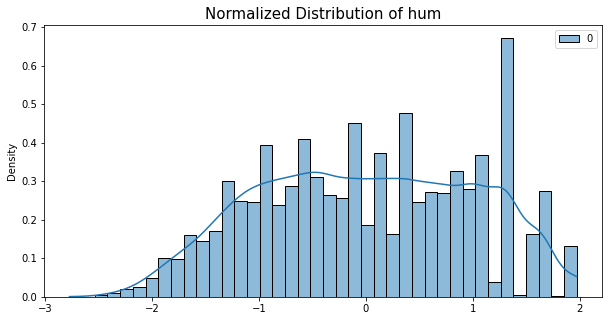

In [33]:
normal_hum = PowerTransformer().fit_transform(df.loc[(df['hum'] != 0) & df['hum'].notna(), ['hum']])
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Normalized Distribution of hum', fontsize=15)
sns.histplot(normal_hum, ax=ax, kde=True, stat='density')

From this normalized distribution, one can see that the variable's range has changed significantly. This can be resolved with a `MinMaxScaler`, to restore this variable to the 0-1 interval.

<AxesSubplot:title={'center':'Original Distribution of hum'}, ylabel='Density'>

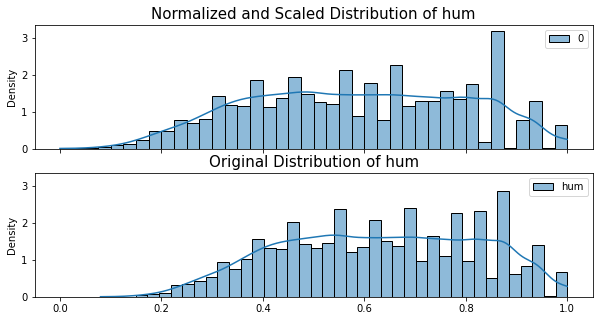

In [34]:
normal_hum = MinMaxScaler().fit_transform(normal_hum)
fig, axs = plt.subplots(figsize=(10, 5), nrows=2, sharex=True, sharey=True)
axs[0].set_title('Normalized and Scaled Distribution of hum', fontsize=15)
sns.histplot(normal_hum, ax=axs[0], kde=True, stat='density')

axs[1].set_title('Original Distribution of hum', fontsize=15)
sns.histplot(df.loc[(df['hum'] != 0) & df['hum'].notna(), ['hum']], ax=axs[1], kde=True, stat='density')

The results of this transformation are ridiculously slight. It may make sense to leave 'hum' as it is.

#### 3.4.3 Final Pipeline

In [35]:
hum_pipe = Pipeline([
                    ('imputer', FunctionTransformer(
                                                    impute_with_month, 
                                                    kw_args={'colname': 'hum', 'outlier_value': 0}
                                                    )),
                    ('normalizer', PowerTransformer()),
                    ('scaler', MinMaxScaler())])
hum_pipe.fit_transform(df[['Month', 'hum']])

array([[0.78442201],
       [0.77319134],
       [0.77319134],
       ...,
       [0.55115425],
       [0.50735969],
       [0.60619176]])

### 3.5 Cleaning, Encoding and Transforming 'windspeed'
The preprocessing of 'windspeed' is very similar to that of 'hum':
1. Impute missing and outlier values with the most common values of each month.
2. Normalize the column's distribution with `PowerTransformer` and `MinMaxScaler`.

#### 3.5.1 Deailing with outliers and NaN values

In [36]:
print(f"After the imputation, there remain {impute_with_month(df[['Month', 'windspeed']], 'windspeed', outlier_value='iqr').isna().sum()[0]} null values")

After the imputation, there remain 0 null values


#### 3.5.2 Normalizing 'windspeed'

In [37]:
normal_speed = make_pipeline(
                            PowerTransformer(),
                            MinMaxScaler()
                            ).fit_transform(df.loc[df['windspeed'].notna(), ['windspeed']])

#### 3.5.3 Final Pipeline

In [38]:
windspeed_pipe = Pipeline([
                            ('imputer', FunctionTransformer(
                                                            impute_with_month, 
                                                            kw_args={'colname': 'windspeed', 'outlier_value': 'iqr'}
                                                            )),
                            ('normalizer', PowerTransformer()),
                            ('scaler', MinMaxScaler())])
speed_clean = windspeed_pipe.fit_transform(df[['Month', 'windspeed']])

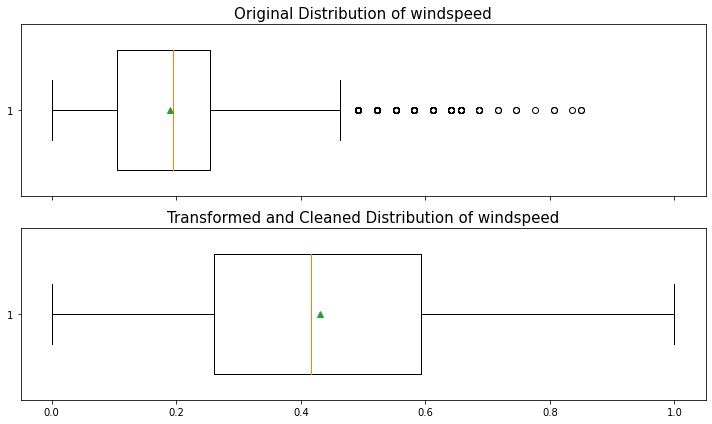

In [39]:
fig, axs = plt.subplots(figsize=(10, 6), ncols=1, nrows=2, sharex=True)
axs[0].set_title('Original Distribution of windspeed', fontsize=15)
axs[0].boxplot(df['windspeed'].dropna().values, vert=False, widths=0.7, showmeans=True)

axs[1].set_title('Transformed and Cleaned Distribution of windspeed', fontsize=15)
axs[1].boxplot(speed_clean, vert=False, widths=0.7, showmeans=True)
fig.tight_layout()

The change in distribution skewness is more significant, and as was desired, the distribution is much more centered without outliers.

### 3.6 Cleaning, Encoding and Transforming 'atemp' and 'temp'
'temp' and 'atemp' are significantly correlated variables representing temperature and thermal sensation, respectively. As a result, one has to be very careful to avoid introducing redundant features to train the model. Moreover, both have missing values, appearing for different observations of the dataset. As a result, this is the preprocessing staregy which best fits these two:
* Combine both features into one by computing the weighted average of both
* Impute missing values of one with the values of the same row of the other.

This simple preprocessing results in a new column called **'wtemp'**.

In [40]:
df.loc[df['temp'].isna(),'temp'] = df.loc[df['temp'].isna(),'atemp']
df.loc[df['atemp'].isna(),'atemp'] = df.loc[df['atemp'].isna(),'temp']
df['wtemp'] = 0.5 * df['temp'] + 0.5 * df['atemp']
print(f"After the imputation, there remain {df['temp'].isna().sum()} null values in temp and {df['atemp'].isna().sum()} null values in atemp.")

After the imputation, there remain 0 null values in temp and 0 null values in atemp.


### 3.7 Encoding and Transforming 'cnt'
Given that 'cnt' is significantly right-skewed, it can benefit from a `PowerTransformer` to normalize it. Once it is applied, outliers clearly disappear. Note that since this is our target, it is not necessary to rescale this variable.

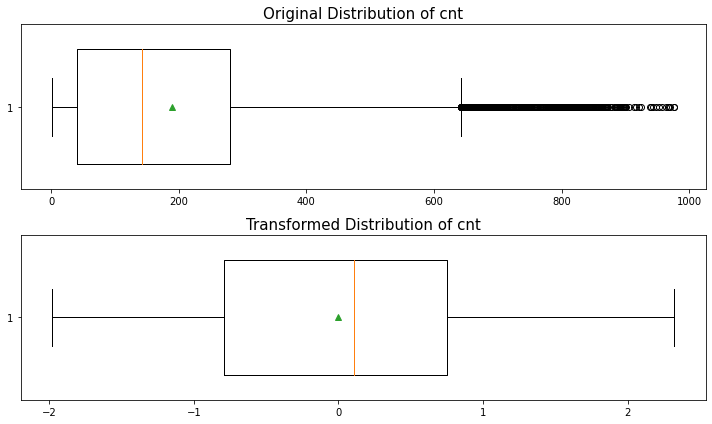

In [41]:
fig, axs = plt.subplots(figsize=(10, 6), ncols=1, nrows=2, sharex=False)
axs[0].set_title('Original Distribution of cnt', fontsize=15)
axs[0].boxplot(df['cnt'].dropna().values, vert=False, widths=0.7, showmeans=True)

axs[1].set_title('Transformed Distribution of cnt', fontsize=15)
axs[1].boxplot(PowerTransformer().fit_transform(df[['cnt']].dropna()), vert=False, widths=0.7, showmeans=True)
fig.tight_layout()

In [42]:
cnt_pipe = Pipeline([('normalizer', PowerTransformer())])
cnt_pipe.fit_transform(df[['cnt']])

array([[-1.25293412],
       [-0.79138624],
       [-0.91649579],
       ...,
       [-0.25695807],
       [-0.52978944],
       [-0.66981579]])

### 3.8 Assembling all Preprocessing Steps
What remains now is to join all the mentioned steps, as well as all generated features, into the same ColumnTransformer.

In [43]:
df.columns

Index(['dteday', 'hr', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'Month', 'Winter', 'Spring', 'Summer',
       'Fall', 'Day_of_Week', 'Weekend', 'Holidays', 'Daylight', 'Rush_Hour',
       'wtemp'],
      dtype='object')

In [44]:
preprocessing = ColumnTransformer([
                            ('hr_scaler', MinMaxScaler(), ['hr']),
                            ('weather_transformer', weathersit_pipe, ['Month', 'weathersit']),
                            ('hum_transformer', hum_pipe, ['Month', 'hum']),
                            ('windspeed_transformer', windspeed_pipe, ['Month', 'windspeed']),
                            ('numeric_passthrough', 'passthrough', ['wtemp']),
                            ('boolean_passthrough', 'passthrough', 
                                 ['Winter', 'Spring', 'Summer', 'Fall', 'Weekend', 'Holidays', 'Daylight', 'Rush_Hour']),
                            ], remainder='drop')

**Important note on the preprocessing of 'cnt':** Since when creating a Pipeline including the classifier and the preprocessing pipeline, X and y have to be inputted separately, and the preprocessing pipeline is only applied to X, it is necessary to normalize y separately, outside of the preprocessing pipeline.

### 3.9 Examining Correlations after Preprocessing
To get a sense of whether this preprocessing has refined the relationship between columns, let's take a look at the correlation matrix of all relevant columns.

In [45]:
df_processed = pd.DataFrame(
                            data=preprocessing.fit_transform(df),
                            columns=['hr', 'Clear', 'Mist', 'Precipitation', 'Heavy_Weather', 'hum', 'windspeed',
                                     'wtemp', 'Winter', 'Spring', 'Summer', 'Fall', 'Weekend', 'Holidays',
                                     'Daylight', 'Rush_Hour']
                            )
cnt_processed = pd.DataFrame(data=cnt_pipe.fit_transform(df[['cnt']]), columns=['cnt'])
df_processed = pd.concat((df_processed, cnt_processed), axis=1)

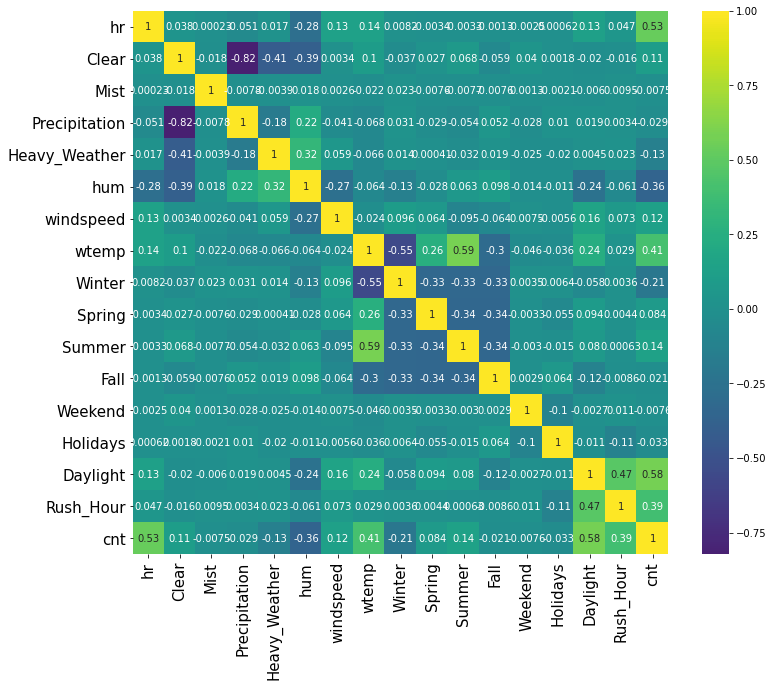

In [46]:
fig, ax = plt.subplots(figsize=(12, 10))
corr_mat = sns.heatmap(df_processed.corr(), annot=True, cmap='viridis', ax=ax, center=0, annot_kws={"fontsize":10})
xtick_labels = corr_mat.get_xmajorticklabels()
ytick_labels = corr_mat.get_ymajorticklabels()
_ = corr_mat.set_xticklabels(xtick_labels, fontsize = 15)
_ = corr_mat.set_yticklabels(ytick_labels, fontsize = 15)

It seems that 'Daylight' and 'Rush_Hour' have a very strong positive correlation with 'cnt', even eclipsing the correlation that 'wtemp' should have with the target. With respect to 'hr' one can see that its normalization has increased its correlation with 'cnt' significantly. To the group of variables that are negatively correlated with 'cnt', mainly occupied by 'hum', one can add 'Heavy Weather' and 'Winter'. This makes sense.

## 4. Choosing and Training a Model
Now that the features in the dataset have been refined and new valuable features have been generated, it is time to test different models

### 4.1 Splitting into Training and Test Datasets

In [47]:
cut_date = datetime.strptime('30-09-2012', '%d-%m-%Y')

df_train = df.loc[df['dteday'] <= cut_date, :]
X_train = df_train.drop(columns='cnt')
y_train = cnt_pipe.fit_transform(df_train[['cnt']])

df_test = df.loc[df['dteday'] > cut_date, :]
X_test = df_test.drop(columns='cnt')
y_test = cnt_pipe.fit_transform(df_test[['cnt']])

X = df.drop(columns='cnt')
y = cnt_pipe.fit_transform(df[['cnt']])

### 4.2 Simple Linear Regression
Let's start this prediction with a simple linear regression.

In [48]:
clf_1 = Pipeline([
    ('preprocessing', preprocessing),
    ('regressor', LinearRegression())
])

In [49]:
clf_1.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('hr_scaler', MinMaxScaler(),
                                                  ['hr']),
                                                 ('weather_transformer',
                                                  Pipeline(steps=[('mapper_and_imputer',
                                                                   FunctionTransformer(func=<function map_and_impute_weather at 0x7fe77d537280>)),
                                                                  ('weather_encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Month', 'weathersit']),
                                                 ('hum_transformer',
                                                  Pipeline(steps=[('i...
                                                                   FunctionTransformer(func=<function impute_with_month at 0x7fe77d4af3a0>,
                                                                                       kw_args={'colname': 'windspeed',
                                                                                                'outlier_value': 'iqr'})),
                                                                  ('normalizer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Month', 'windspeed']),
                                                 ('numeric_passthrough',
                                                  'passthrough', ['wtemp']),
                                                 ('boolean_passthrough',
                                                  'passthrough',
                                                  ['Winter', 'Spring', 'Summer',
                                                   'Fall', 'Weekend',
                                                   'Holidays', 'Daylight',
                                                   'Rush_Hour'])])),
                ('regressor', LinearRegression())])

In [50]:
y_pred1 = clf_1.predict(X_test)
print(f'Linear Regression: R2 = {r2_score(y_test, y_pred1):.4f}')

Linear Regression: R2 = 0.6216


### 4.3 k-NN Regression
Now, to another simple model: k-nearest neighbors for regression. Note how simple it is to implement these models with scikit-learn.

In [51]:
clf_2 = Pipeline([
    ('preprocessing', preprocessing),
    ('regressor', KNeighborsRegressor())
])

In [52]:
clf_2.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('hr_scaler', MinMaxScaler(),
                                                  ['hr']),
                                                 ('weather_transformer',
                                                  Pipeline(steps=[('mapper_and_imputer',
                                                                   FunctionTransformer(func=<function map_and_impute_weather at 0x7fe77d537280>)),
                                                                  ('weather_encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Month', 'weathersit']),
                                                 ('hum_transformer',
                                                  Pipeline(steps=[('i...
                                                                   FunctionTransformer(func=<function impute_with_month at 0x7fe77d4af3a0>,
                                                                                       kw_args={'colname': 'windspeed',
                                                                                                'outlier_value': 'iqr'})),
                                                                  ('normalizer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Month', 'windspeed']),
                                                 ('numeric_passthrough',
                                                  'passthrough', ['wtemp']),
                                                 ('boolean_passthrough',
                                                  'passthrough',
                                                  ['Winter', 'Spring', 'Summer',
                                                   'Fall', 'Weekend',
                                                   'Holidays', 'Daylight',
                                                   'Rush_Hour'])])),
                ('regressor', KNeighborsRegressor())])

In [53]:
y_pred2 = clf_2.predict(X_test)
print(f'k-NN Regression: R2 = {r2_score(y_test, y_pred2):.4f}')

k-NN Regression: R2 = 0.7375


### 4.4 Random Forest Regression
Now let's shift to more complex models, such as this random forest regressor. It is expected to better capute the non-linear relationships within the dataset.

In [54]:
clf_3 = Pipeline([
    ('preprocessing', preprocessing),
    ('regressor', RandomForestRegressor())
])

In [55]:
clf_3.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('hr_scaler', MinMaxScaler(),
                                                  ['hr']),
                                                 ('weather_transformer',
                                                  Pipeline(steps=[('mapper_and_imputer',
                                                                   FunctionTransformer(func=<function map_and_impute_weather at 0x7fe77d537280>)),
                                                                  ('weather_encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Month', 'weathersit']),
                                                 ('hum_transformer',
                                                  Pipeline(steps=[('i...
                                                                   FunctionTransformer(func=<function impute_with_month at 0x7fe77d4af3a0>,
                                                                                       kw_args={'colname': 'windspeed',
                                                                                                'outlier_value': 'iqr'})),
                                                                  ('normalizer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Month', 'windspeed']),
                                                 ('numeric_passthrough',
                                                  'passthrough', ['wtemp']),
                                                 ('boolean_passthrough',
                                                  'passthrough',
                                                  ['Winter', 'Spring', 'Summer',
                                                   'Fall', 'Weekend',
                                                   'Holidays', 'Daylight',
                                                   'Rush_Hour'])])),
                ('regressor', RandomForestRegressor())])

In [56]:
y_pred3 = clf_3.predict(X_test)
print(f'Random Forest Regression: R2 = {r2_score(y_test, y_pred3):.4f}')

Random Forest Regression: R2 = 0.8514


As expected, the increase in R2 is fairly significant, not that non-linear relationships, like the one between 'hr' and 'cnt' are better encapsulated.

### 4.5 Gradient Boosting Regression
The last regressor to be attempted in this study is `GradientBoostingRegressor`. This algorithm is also expected to take into account the non-linearities of the dataset.

In [57]:
clf_4 = Pipeline([
    ('preprocessing', preprocessing),
    ('regressor', GradientBoostingRegressor())
])

In [58]:
clf_4.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('hr_scaler', MinMaxScaler(),
                                                  ['hr']),
                                                 ('weather_transformer',
                                                  Pipeline(steps=[('mapper_and_imputer',
                                                                   FunctionTransformer(func=<function map_and_impute_weather at 0x7fe77d537280>)),
                                                                  ('weather_encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Month', 'weathersit']),
                                                 ('hum_transformer',
                                                  Pipeline(steps=[('i...
                                                                                       kw_args={'colname': 'windspeed',
                                                                                                'outlier_value': 'iqr'})),
                                                                  ('normalizer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Month', 'windspeed']),
                                                 ('numeric_passthrough',
                                                  'passthrough', ['wtemp']),
                                                 ('boolean_passthrough',
                                                  'passthrough',
                                                  ['Winter', 'Spring', 'Summer',
                                                   'Fall', 'Weekend',
                                                   'Holidays', 'Daylight',
                                                   'Rush_Hour'])])),
                ('regressor', GradientBoostingRegressor())])

In [59]:
y_pred4 = clf_4.predict(X_test)
print(f'Gradient Boosting Regressor: R2 = {r2_score(y_test, y_pred4):.4f}')

Gradient Boosting Regressor: R2 = 0.8164


These results are fairly less impressive. However, there is still a large amount of hyperparameter tweaking to do.

### 4.6 Hyperparameter Tuning and Model Selection

In order to select the best model with the most appropriate set of parameters, we will now make use of scikit-learn's `GridSearchCV`, with a custom cross validation scheme which simply uses the splitting into test and train datasets as specified in the guidelines of this study.

In [60]:
custom_cv = [(np.arange(0, len(X_train)), np.arange(len(X_train), len(df)))]

The following model and parameter combinations will be tested:
* `KNeighborsRegressor` with varying n_neighbors and the p defining the Minkowski distance.
* `RandomForestRegressor` with varying n_estimators, maximum depth, and minimum samples to split an internal node.
* `GradientBoostingRegressor` with varying learning rate, number of estimators, and number of iterations for early stopping.

In [61]:
param_grid = [
    {"regressor": [KNeighborsRegressor()], 
     "regressor__n_neighbors": [5, 7, 10, 15],
     "regressor__p": [1, 2, 3]},
    
    {"regressor": [RandomForestRegressor()],
     "regressor__n_estimators": [50, 100, 150],
     "regressor__max_depth": [3, 10, 20, 25],
     "regressor__min_samples_split": [2, 5, 10]},
    
    {"regressor": [GradientBoostingRegressor()],
     "regressor__learning_rate": [0.05, 0.1, 0.5],
     "regressor__n_estimators": [50, 100, 150],
     "regressor__n_iter_no_change": [None, 10, 20, 30]}
]

In [62]:
clf = Pipeline([
                ('preprocessing', preprocessing),
                ('regressor', RandomForestRegressor())
])

In [63]:
gs = GridSearchCV(clf, param_grid, cv=custom_cv, scoring='r2', n_jobs=-1, verbose=3)

In [64]:
gs.fit(X, np.ravel(y))

Fitting 1 folds for each of 84 candidates, totalling 84 fits


GridSearchCV(cv=[(array([    0,     1,     2, ..., 15208, 15209, 15210]),
                  array([15211, 15212, 15213, ..., 17376, 17377, 17378]))],
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('hr_scaler',
                                                                         MinMaxScaler(),
                                                                         ['hr']),
                                                                        ('weather_transformer',
                                                                         Pipeline(steps=[('mapper_and_imputer',
                                                                                          FunctionTransformer(func=<function map_and_impute_weather at 0x7fe77d537280...
                                                              min_samples_split=10,
                                                              n_estimators=50)],
                          'regressor__max_depth': [3, 10, 20, 25],
                          'regressor__min_samples_split': [2, 5, 10],
                          'regressor__n_estimators': [50, 100, 150]},
                         {'regressor': [GradientBoostingRegressor()],
                          'regressor__learning_rate': [0.05, 0.1, 0.5],
                          'regressor__n_estimators': [50, 100, 150],
                          'regressor__n_iter_no_change': [None, 10, 20, 30]}],
             scoring='r2', verbose=3)

In [65]:
gs.cv_results_

{'mean_fit_time': array([ 0.20957589,  0.21041727,  0.21200991,  0.20267606,  0.28196406,
         0.2316339 ,  0.23368692,  0.28099918,  0.22825789,  0.29535699,
         0.2464273 ,  0.22801399,  2.54616332,  1.96987987,  2.66340423,
         1.01964688,  1.89333415,  2.81222701,  1.20074105,  1.88373399,
         2.65280986,  2.1572299 ,  4.1793139 ,  6.58186984,  2.05756712,
         4.54888225,  6.68257999,  2.62976599,  4.15507483,  5.91657495,
         3.80436778,  7.44372296, 13.06285596,  2.99843979,  7.35453606,
        13.21131229,  4.25016904,  8.3779583 , 10.47379875,  5.96865201,
         7.31931806, 10.57984304,  3.08393121,  5.93770289,  8.8864162 ,
         2.6998558 ,  5.405931  ,  8.45703673,  1.07809281,  1.05365777,
         1.18632698,  1.12283301,  2.35437393,  2.34180999,  2.29531479,
         3.7058239 ,  5.50237226,  5.45616984,  4.82534909,  5.08994102,
         1.50847101,  1.39860415,  2.12403083,  2.67714119,  5.78186488,
         5.23733902,  5.09712005, 

In [66]:
gs.best_score_

0.7832219454338483

In [67]:
gs.best_params_

{'regressor': RandomForestRegressor(max_depth=25, min_samples_split=10, n_estimators=50),
 'regressor__max_depth': 25,
 'regressor__min_samples_split': 10,
 'regressor__n_estimators': 50}

Based on the previous trials with individual models, this best choice is somewhat expected. What is strange is:
* The best score of the grid search is lower than the previous prediction with `RandomForestRegressor`.
* The hyperparameter choice for this classifier is somewhat different from the default one which scikit-learn provides.

Let's now see whether further improvement can be obtained from tweaking the hyperparameters in `RandomForestRegressor`.

### 4.7 Further Hyperparameter Tuning for `RandomForestRegressor`
#### 4.7.1 Tuning `n_estimators`

In [68]:
n_estimators = np.arange(20, 200, 10)
train_scores, test_scores = validation_curve(clf, X, np.ravel(y), cv=custom_cv, param_name="regressor__n_estimators", param_range=n_estimators, scoring='r2')

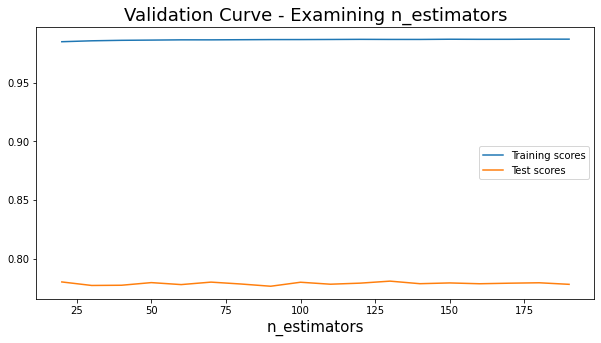

In [69]:
plt.figure(figsize=(10,5))
plt.title('Validation Curve - Examining n_estimators', fontsize=18)
plt.plot(n_estimators, train_scores, label='Training scores')
plt.plot(n_estimators, test_scores, label='Test scores')
plt.xlabel('n_estimators', fontsize=15)
plt.legend()

There is no clear improvement in any of the scores for variations in this hyperparameter. If this model is overfitting, it is certainly not due to `n_estimators`. It seems that it is fairly irrelvant for the test score whether `n_estimators` is 50 (as obtained through the previous grid search) or 100 (the default by the library). One can only see a benefit in reducing training and prediction time by reducing this parameter as much as possible.
#### 4.7.2 Tuning `max_depth`

In [77]:
max_depth = np.arange(3, 35, 2)
train_scores, test_scores = validation_curve(clf, X, np.ravel(y), cv=custom_cv, param_name="regressor__max_depth", param_range=max_depth, scoring='r2')

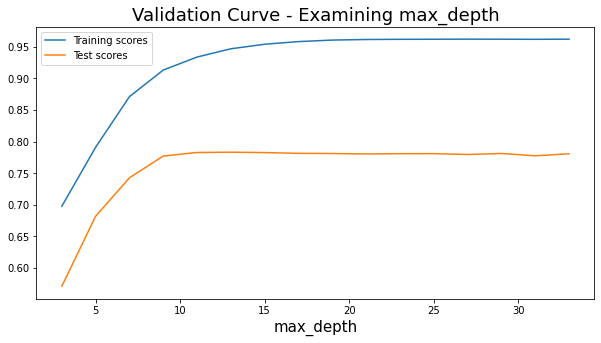

In [78]:
plt.figure(figsize=(10,5))
plt.title('Validation Curve - Examining max_depth', fontsize=18)
plt.plot(max_depth, train_scores, label='Training scores')
plt.plot(max_depth, test_scores, label='Test scores')
plt.xlabel('max_depth', fontsize=15)
plt.legend()

These findings were not seen with `GridSearchCV`! What we see here is that there is an optimum value for `max_depth`, beyong which the model does not worsen significantly. In the grid search, the only suggested parameters were `[3, 10, 20, 25]`, and the best model was the one with `max_depth = 25`. However, we have found here that setting `max_depth = 10` yields a very similar prediction for the test set.
#### 4.7.3 Tuning `min_samples_split`
The last relevant hyperparameter of the model to be tweaked in this study defines the minimum number of samples that are required in a node for such node to be split in the training.

In [72]:
min_samples_split = np.arange(2, 50, 4)
train_scores, test_scores = validation_curve(clf, X, np.ravel(y), cv=custom_cv, param_name="regressor__min_samples_split", param_range=min_samples_split, scoring='r2')

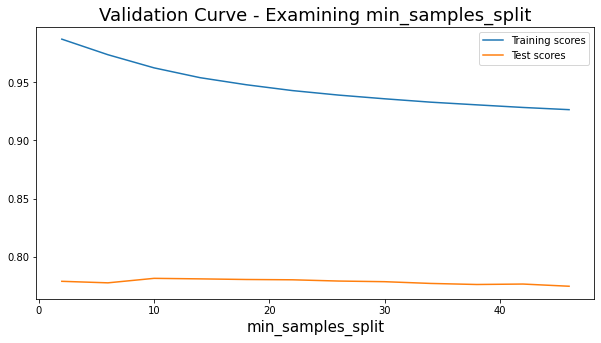

In [73]:
plt.figure(figsize=(10,5))
plt.title('Validation Curve - Examining min_samples_split', fontsize=18)
plt.plot(min_samples_split, train_scores, label='Training scores')
plt.plot(min_samples_split, test_scores, label='Test scores')
plt.xlabel('min_samples_split', fontsize=15)
plt.legend()

This parameter does not seem to contribute much to the test score of the model. In any case, it seems that `min_samples_split=10` maximizes the test score.
#### 4.7.4 Final Hyperparameter Selection
After these validations, the optimum parameter combination for `RandomForestRegressor`for the current dataset follows:
* `n_estimators = 50`
* `max_depth = 10`
* `min_samples_split = 10`

### 4.8 Prediction with Optimum Model
Let's examine how well the optimum model performs predicting the datastet.

In [79]:
clf = Pipeline([
                ('preprocessing', preprocessing),
                ('regressor', RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=10))
])
clf.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('hr_scaler', MinMaxScaler(),
                                                  ['hr']),
                                                 ('weather_transformer',
                                                  Pipeline(steps=[('mapper_and_imputer',
                                                                   FunctionTransformer(func=<function map_and_impute_weather at 0x7fe77d537280>)),
                                                                  ('weather_encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Month', 'weathersit']),
                                                 ('hum_transformer',
                                                  Pipeline(steps=[('i...
                                                                                                'outlier_value': 'iqr'})),
                                                                  ('normalizer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Month', 'windspeed']),
                                                 ('numeric_passthrough',
                                                  'passthrough', ['wtemp']),
                                                 ('boolean_passthrough',
                                                  'passthrough',
                                                  ['Winter', 'Spring', 'Summer',
                                                   'Fall', 'Weekend',
                                                   'Holidays', 'Daylight',
                                                   'Rush_Hour'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_split=10,
                                       n_estimators=50))])

In [80]:
y_pred = clf.predict(X_test)
print(f'Optimum Regressor: R2 = {r2_score(y_test, y_pred):.4f}')

Optimum Regressor: R2 = 0.8562


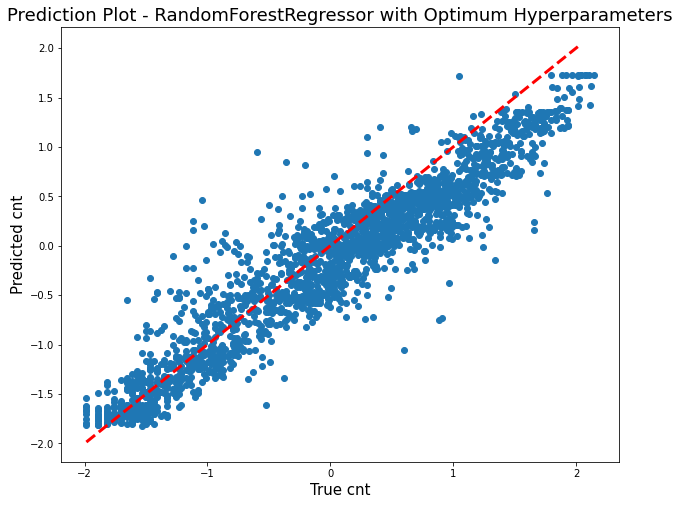

In [81]:
plt.figure(figsize=(10,8))
plt.title('Prediction Plot - RandomForestRegressor with Optimum Hyperparameters', fontsize=18)
plt.scatter(y_test, y_pred)
diagonal = np.arange(min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred)))
plt.plot(diagonal, diagonal, 'r--', linewidth=3)
plt.xlabel('True cnt', fontsize=15)
plt.ylabel('Predicted cnt', fontsize=15)
plt.show()

One can see that the developed model, in conjunction with the aforementioned preprocessing steps, results in an apt prediction of the number of rental bicycles per hour. If one were to find possible flaws in this prediction, one could argue that for very large values of the true 'cnt', the model underestimates the magnitude systematically. Moreover, one could add that the error in prediction is larger for lower values of 'cnt', since then the deviation from the pure diagonal is greater.
## 5. Conclusions
This study has effectively prepared a dataset for its prediction with a model, which in turn has been selected after a thorough search within linear and non-linear algorithms, simultaneously evaluating their performance with different parameter choices. 

With respect to the exploratory data analysis, the following can be extracted:
* 'weathersit', 'temp', 'atemp', and 'hum' all present NaN values, at different rows
* 'weathersit' is the only categorical feature, with 4 possible categories
* 'temp' and 'atemp' have a fairly centered distribution, whereas 'cnt' and 'windspeed' are right-skewed and 'hum' is left-skewed.
* 'windspeed' and 'cnt' have outliers for large values of the variable, whereas 'hum' has outliers at 0.
* 'atemp' and 'temp' are very strongly correlated with each other, at the same time being correlated significantly with 'cnt'. 'hum' is negatively correlated with 'cnt', and 'hr' follows a non-monotonic relation with 'cnt', with a peak in bicycle rentals around mid-afternoon.

With regards to the data engineering of the dataset, the following steps have been followed:
* From 'dteday', columns indicating the season, whether the day was in the weekend, and whether the day was a holiday, have been generated.
* For 'weathersit', four intuitive categories have been defined, imputing NaN values based on the most common weather condition of each month.
* For 'hr', the numerical value has been re-scaled to the range from 0 to 1, the hours with daylight have been labeled, as well as rush hours.
* For 'hum', outliers at 0 and NaN values have been imputed with the average of each month, and the variable has been normalized to reduce its skweness.
* For 'windspeed', outliers for large values and NaN values have been imputed with the average of each month, and the variable has been normalized to reduce its skweness.
* For 'atemp' and 'temp', both variables have been combined into 'wtemp', imputing outliers within one variable with the corresponding value of the other.
* For the target variable 'cnt', a normalization has seen fit to reduce its skewness, although this transformation is not included in the final preprocessing pipeline.

In order to select and train an adequate model:
* A simple linear regression, a k-nearest neighbors regression, a random forest regression, and a gradient boosting regression have been attempted with default hyperparameters. The model with the best R2 in this preliminary examination was the random forest regressor.
* Based on the three best-performing models, an extensive grid search has been performed, once again confirming the best performance of the random forest regressor.
* As a result, the most relevant hyperparameters of the `RandomForestRegressor` have been further examined, revealing a flawed selection of hyperparameters in the previous grid search. The optimum model corresponded to `n_estimators = 50`, `max_depth = 10`, and `min_samples_split = 10`.
* Predicting with this optimum model resulted in `R2 = 0.856`, with a satisfactory prediction plot.

To further improve this model, the following alternatives can be explored:
* Could all numerical variables be completely normalized, such that their distributions are centered at 0? This would imply normalizing 'wtemp', and not re-scaling any of the other numerical variables ('hum', 'windspeed', etc.) after their normalization.
* Could other more complex models be used to predict 'cnt' with greater success? Would a neural network return a better prediction?
* Could one split the dataset into multiple sub-datasets, training a different model to each split? For example, one could have a model for holidays and another for work-days.
* Could PCA be used to fit a model based on a smaller number of transformed, combined features, resulting in a better model?